# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [9]:
data.describe()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308860,0.496087,0.259654,0.275845,0.171676,0.278926,0.410143,0.442838,0.361775,0.371302
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
n = int(data.race.count())
n_white = int(data.race[data.race=='w'].count())
n_black = int(data.race[data.race=='b'].count())
print('Total sample size: %s' %n)
print('White sample size: %3.0f (%0.0f%%) \nBlack sample size: %3.0f (%0.0f%%)' % (n_white,n_white/n*100, n_black, n_black/n *100))


Total sample size: 4870
White sample size: 2435 (50%) 
Black sample size: 2435 (50%)


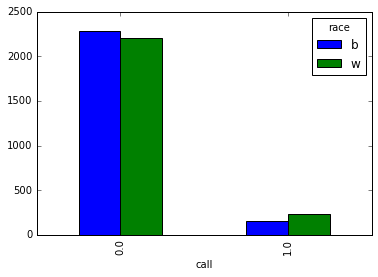

In [25]:
tb = data.groupby(['call','race']).size()
tb.unstack().plot(kind='bar')

In [36]:
#total number of callbacks
callbacks = sum(data['call'])

#number of callbacks for black-sounding names
callbacks_black = sum(data[data.race=='b'].call)
callbacks_black_p = callbacks_black/callbacks

#number of callbacks for white-sounding names
callbacks_white = sum(data[data.race=='w'].call)
callbacks_white_p = callbacks_white/callbacks

print('Black-sounding names received %3.0f callbacks (%3.2f%% of %3.0f total callbacks) \nWhite-souding names that received %3.0f callback (%3.2f%% of %3.0f total callbacks)' 
      % (callbacks_black, callbacks_black_p*100, callbacks, callbacks_white, callbacks_white_p*100,callbacks))

Black-sounding names received 157 callbacks (40.05% of 392 total callbacks) 
White-souding names that received 235 callback (59.95% of 392 total callbacks)


## What test is appropriate for this problem?

The data ha a binary categorical variables as data is encoded as *w* or *b* for race, *0* and *1* for number of callbacks. 

A hypothesis test for the difference between two sample proportions (black-sounding & white-sounding) that receive callbacks

### What are the null and alternate hypotheses?

*Null Hypothesis* : There is no difference between the sucess rate of the two sample proportion

**H0: p_black_success = p_white_succcess**
    
*Alternative Hypothesis* :There is difference between the sucess rate of the two sample proportion

**H0: p_black_success != p_white_succcess**

### Compute margin of error, confidence interval, and p-value.

Point Estimate - Difference between the proportions of sampled black-sounding names and sampled white-sounding names that receive callbacks in the US.

We can apply Central-Limit Theorem(CLT) as
- sample is randomized
- the sample represent US race distribution
- 2 sampled race are indepedent on each other.
- Sample size of black-sounding and white-sounding that received callbacks is larger than 30

In [40]:
p_hat_black = callbacks_black/n_black
p_hat_white = callbacks_white/n_white

# observed number of successess
success_black = n_black*p_hat_black
success_white = n_white*p_hat_white

# observed number of failures
failures_black = n_black*(1-p_hat_black)
failures_white = n_white*(1-p_hat_white)
print('Number of black-sounding name successes: %3.0f v. failures: %3.0f' % (success_black, failures_black))
print('Number of white-sounding name successes: %3.0f v. failures: %3.0f' % (success_white, failures_white))

Number of black-sounding name successes: 157 v. failures: 2278
Number of white-sounding name successes: 235 v. failures: 2200


**We can assume the distribution is normally distributed**
We will assume a 95% confidence interval with an alpha of 0.5

In [56]:
#difference in proportion of 2 samples group
p_hat = p_hat_black - p_hat_white

#standard error - p x (1-p)/n
p_hat_SE_black = p_hat_black * (1-p_hat_black)/n_black
p_hat_SE_white = p_hat_white * (1-p_hat_white)/n_white
SE = np.sqrt(p_hat_SE_black + p_hat_SE_white)

#Confidence Interval
CI = 0.95
Interval = stats.norm.interval(CI,loc=p_hat,scale=SE)

#critical z score
z = stats.norm.ppf(1 - ((1 - CI) / 2))

# margin of error
ME = z*SE

#p-value
p = 2 * stats.norm.cdf(0, p_hat, SE)
#(1-stats.norm.cdf(np.abs(z)))*2


print ('%5s %24.5f' % ('z-score', z))
print ('%5s %12.5f' % ('Standard Error (SE)', SE))
print ('%5s %11.5f' % ('Margin of Error (ME)', ME))
print ('95%% Confidence Interval %5.3f to %3.3f' % Interval)
print ('p-value %24.5f' %p)

z-score                  1.95996
Standard Error (SE)      0.00778
Margin of Error (ME)     0.01526
95% Confidence Interval -0.047 to -0.017
p-value                  1.99996


### Discuss statistical significance.

P-value is less than the significance level of 5%, so I am confident in rejecting my null hypothesis. In other words, there does appear to be racial discrimination in the U.S. labor force